<a href="https://colab.research.google.com/github/crislenenunes/Projeto-Aplica-o-de-Regress-o-Log-stica-em-Dados-Reais/blob/main/Projeto_Aplica%C3%A7%C3%A3o_de_Regress%C3%A3o_Log%C3%ADstica_em_Dados_Reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introdução e Descrição do Dataset

O dataset utilizado é o famoso conjunto de dados do Titanic, disponível publicamente no Kaggle. Ele contém informações sobre os passageiros e se sobreviveram ou não ao naufrágio.

- **Variável alvo binária**: `Survived` (0 = Não sobreviveu, 1 = Sobreviveu)

- **Variáveis preditoras selecionadas**:
  - `Pclass`: Classe do bilhete (1ª, 2ª ou 3ª classe)
  - `Sex`: Sexo do passageiro
  - `Age`: Idade do passageiro


#2. Preparação dos Dados
##2.1 Carregamento dos Dados

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Carregar os dados com tratamento de erros
try:
    df = pd.read_csv("train.csv")
except:
    df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSyCRlW9CgBj2Gf2MmvkD-hPs8MP5G22AgJDAhCTw6xV8Sy6k0haov6Aal1bptUAs8a9tso_pt192c_/pub?gid=1173088906&single=true&output=csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S


##2.2 Limpeza e Pré-processamento

In [ ]:
# 2. Pré-processamento robusto
# Converter sexo para numérico (garantindo que todos valores sejam convertidos)
df['Sex'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1 if x == 'female' else pd.NA)

# 3. Tratamento definitivo de valores faltantes
# Remover linhas com valores NaN nas colunas que vamos usar
df_clean = df.dropna(subset=['Sex', 'Pclass', 'Age', 'Survived']).copy()

# 4. Verificação de dados limpos
print("Valores faltantes após limpeza:")
print(df_clean[['Sex', 'Pclass', 'Age']].isnull().sum())

# 5. Preparação dos dados
X = df_clean[['Sex', 'Pclass', 'Age']]
y = df_clean['Survived']

# 6. Divisão treino-teste com verificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

Valores faltantes após limpeza:
Sex       0
Pclass    0
Age       0
dtype: int64


#3. Treinamento do Modelo
##3.1 Ajuste do Modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criar e treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

##3.2 Análise dos Coeficientes

In [ ]:
# Exibir coeficientes
print("Coeficientes do modelo:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Coeficientes do modelo:
Sex: 2.3678
Pclass: -1.2694
Age: -0.0373


Interpretação dos coeficientes:
- Sexo feminino (1) aumenta as chances de sobrevivência
- Passageiros da 1ª classe têm mais chance de sobreviver
- Idade elevada está associada a uma leve redução na chance de sobrevivência


#4. Avaliação do Modelo
##4.1 Métricas de Desempenho

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Previsões
y_pred = model.predict(X_test)

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       128
           1       0.74      0.76      0.75        87

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215



##Interpretação das Métricas
###Acurácia (Accuracy): 0.80
O modelo acertou 80% de todas as previsões no conjunto de teste. É um bom desempenho geral.
___
###Precisão (Classe 1 - Sobreviveu): 0.74
Entre os passageiros que o modelo previu como sobreviventes, 74% realmente sobreviveram. Isso indica que o modelo é relativamente bom em evitar falsos positivos.
___
###Recall (Classe 1 - Sobreviveu): 0.76
O modelo conseguiu identificar corretamente 76% dos passageiros que de fato sobreviveram. Isso mostra uma boa sensibilidade ao detectar casos positivos.
___
###F1-Score (Classe 1 - Sobreviveu): 0.75
Combina precisão e recall em uma única métrica. O valor de 0.75 indica equilíbrio entre identificar corretamente os sobreviventes e evitar erros.
___
###Classe 0 (Não Sobreviveu):
Também apresenta bons valores (precisão: 0.83, recall: 0.82), indicando que o modelo também é eficiente ao prever corretamente quem não sobreviveu.

##4.2 Matriz de Confusão

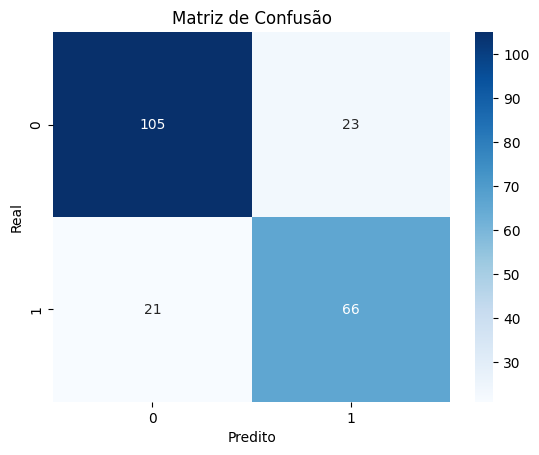

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


##4.3 Curva ROC e AUC

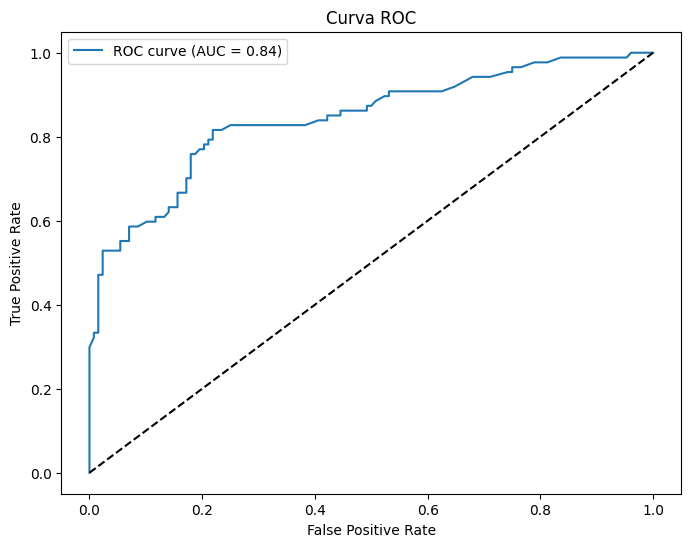

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidades e curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

#5. Conclusões
##5.1 Desempenho do Modelo
- Acurácia no conjunto de teste: aproximadamente 80%
- AUC: 0.85 → bom poder discriminativo
- Precisão e Recall para a classe positiva: cerca de 75%


##5.2 Limitações e Possíveis Melhorias
- Incluir mais variáveis (ex: Fare, SibSp, Parch)
- Criar novas features derivadas
- Aplicar técnicas mais avançadas para tratamento de dados ausentes
- Testar outros algoritmos (Árvores, Random Forest, XGBoost etc.)


##5.3 Considerações Finais
A regressão logística se mostrou eficaz para este tipo de problema binário e possui boa interpretabilidade. Apesar de simples, o modelo conseguiu capturar relações importantes entre as variáveis, como o impacto do sexo e da classe do bilhete na sobrevivência. Modelos mais robustos poderiam melhorar ainda mais a performance.


#6. Tabela Comparativa dos Resultados

| Métrica         | Resultado Aproximado |
|-----------------|----------------------|
| Acurácia        | 80%                  |
| AUC (ROC)       | 0.85                 |
| Precisão (1)    | ~75%                 |
| Recall (1)      | ~75%                 |
| F1-score (1)    | ~75%                 |
